In [8]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


### Q1:每个用户拥有多少个朋友？（知识点：字典推导式）

In [9]:
#输出每个id对应的朋友
friendships = {user["id"]: [] for user in users} #字典推导式

for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j
    
print(friendships)


{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [10]:
#总朋友数/用户个数=平均个数
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user)     # number_of_friends(user)数据类型是什么？
                        for user in users)  

print(total_connections)

24


### Q2:每个用户的平均朋友

In [11]:
num_users = len(users)                            # length of the users list
avg_connections = total_connections / num_users   # 24 / 10 == 2.4

### Q3:找到拥有朋友最多的用户（还有其他方法吗？）

In [12]:
num_friends_by_id = [(user["id"], number_of_friends(user)) 
                     for user in users]

num_friends_by_id.sort(                                # Sort the list
       key=lambda id_and_friends: id_and_friends[1],   # by num_friends
       reverse=True)  
print(num_friends_by_id)


[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


### Q4:遍历朋友的朋友

In [13]:
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]] # 嵌套列表推导式
print(friendships[0])
print(friendships[1])

[1, 2]
[0, 2, 3]


### Q5:不同用户的共同朋友数（counter）

In [14]:
from collections import Counter                   # not loaded by default

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )


print(friends_of_friends(users[3]))               # Counter({0: 2, 5: 1})


Counter({0: 2, 5: 1})


### Q6: 找到目标兴趣的所有用户

In [15]:
#一种方法
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

#这种方法的缺陷在哪？

In [16]:
#另一种快捷方法（defaultdict）
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [17]:
#从该用户到兴趣
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

### Q7:哪个兴趣用户最多？

In [18]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

### 完成一个任务

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})
defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})


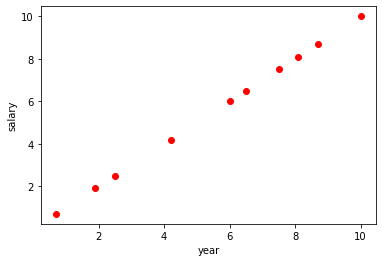

In [19]:
from collections import defaultdict
from matplotlib import pyplot as plt
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
print(salary_by_tenure)
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
print(salary_by_tenure)
salary,year=zip(*salaries_and_tenures)
plt.scatter(year,year,marker='o',color='red')

plt.xlabel('year')
plt.ylabel('salary')
plt.show()



In [20]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


In [21]:
from collections import Counter
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


### 知识点：
- 列表推导式、字典和元组推导式
- collections（defaultdic，List,Tuple,Counter)
- 函数、类、模块、包、库概念的区别
- from import使用的区别